In [1]:
import pandas as pd
import numpy as np
# from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from automl.data import Dataset
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor

In [2]:
FILE = Path(".").absolute().resolve()
DATADIR = FILE / "data"
# ["bike_sharing_demand", "brazilian_houses", "superconductivity", "wine_quality", "yprop_4_1"]
dataset = Dataset.load(DATADIR, "yprop_4_1", 1)
X_train, y_train, X_test, y_test = dataset.load_test_train()
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [3]:
reg1 = RandomForestRegressor(random_state=42)
reg1.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
result = permutation_importance(reg1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

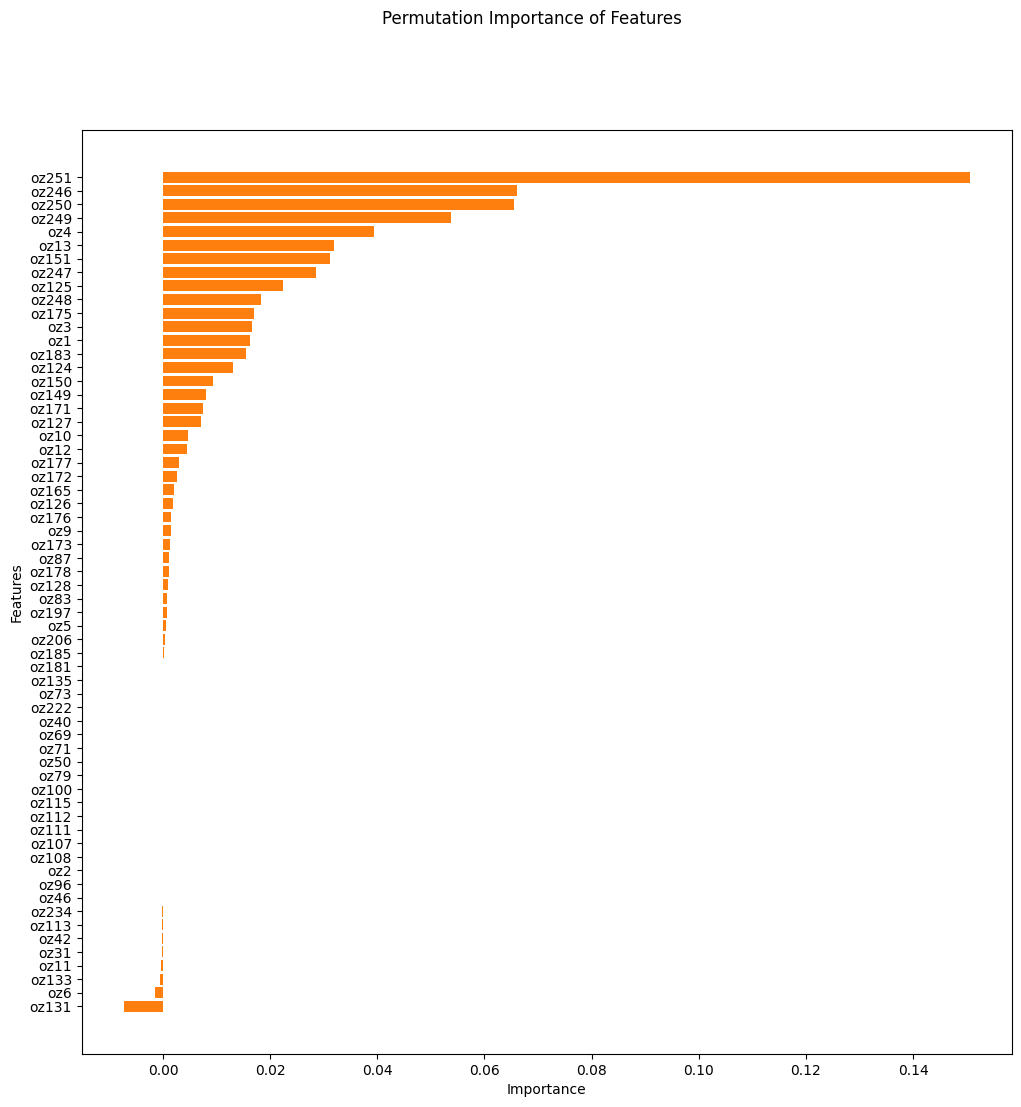

In [5]:
perm_sorted_idx = result["importances_mean"].argsort()
fig1, ax1 = plt.subplots(figsize=(12, 12))
plt.barh(X.columns[perm_sorted_idx], result["importances_mean"][perm_sorted_idx].T)
y_pos = np.arange(len(X.columns[perm_sorted_idx]))
ax1.barh(y_pos, result["importances_mean"][perm_sorted_idx], align="center")
ax1.set_yticks(y_pos, labels=X.columns[perm_sorted_idx])
ax1.set_ylabel('Features')
ax1.set_xlabel('Importance')
fig1.suptitle('Permutation Importance of Features')
plt.show()

Text(0.5, 0, 'Importance')

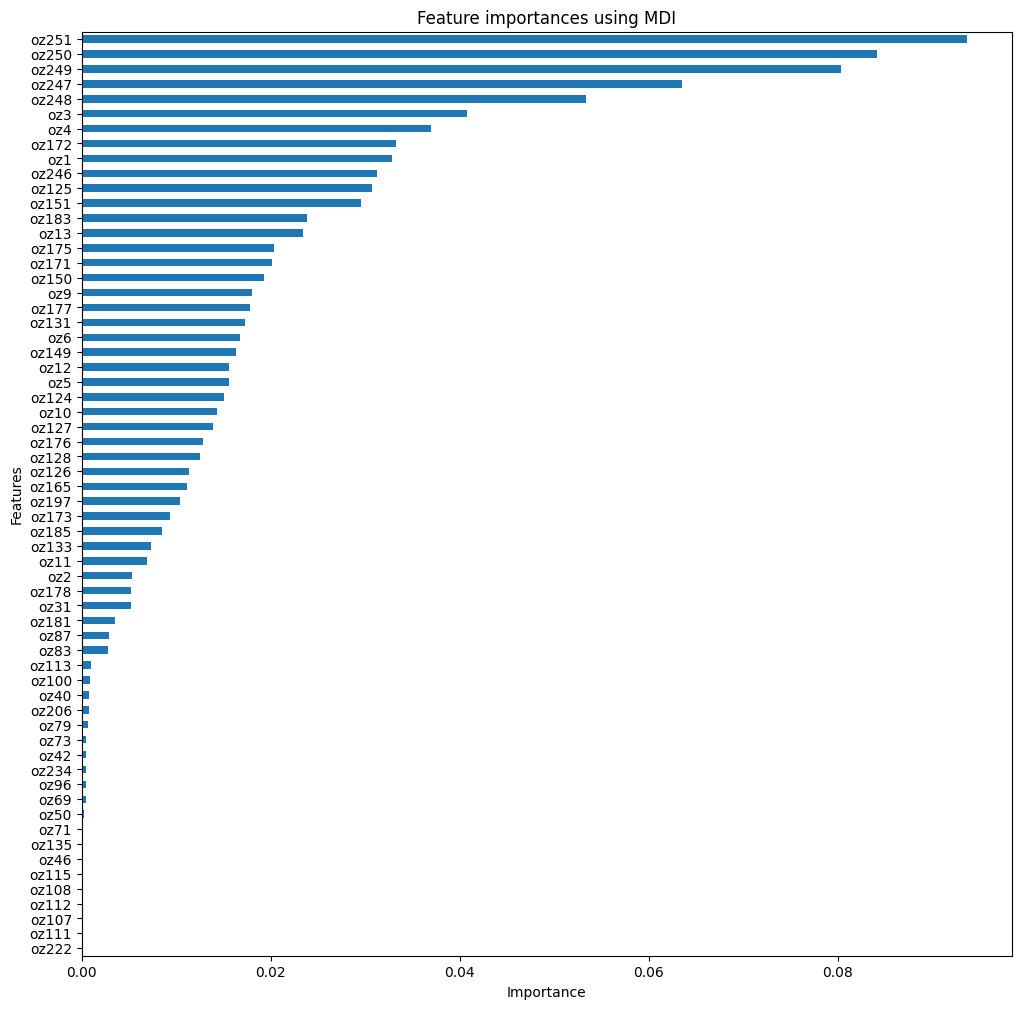

In [6]:
mdi_importances = pd.Series(reg1.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg1.feature_importances_)
fig2, ax2 = plt.subplots(figsize=(12, 12))
mdi_importances.sort_values().plot.barh(ax=ax2)
ax2.set_title("Feature importances using MDI")
ax2.set_ylabel("Features")
ax2.set_xlabel("Importance")

In [7]:
num_features_to_select = int(len(X_train.columns) * 0.75) # Select top 75% of features
selected_columns_permuted = X_train.columns[perm_sorted_idx][-num_features_to_select:]
selected_columns_tree = X_train.columns[tree_importance_sorted_idx][-num_features_to_select:]
X_perm = X_train[selected_columns_permuted]
X_tree = X_train[selected_columns_tree]
print(f"Original no. of features: {len(X_train.columns)} \nNo. of features selected: {len(X_perm.columns)}")
print(f"Permuted features: {X_perm.columns}, \nTree features: {X_tree.columns}")

Original no. of features: 62 
No. of features selected: 46
Permuted features: Index(['oz100', 'oz79', 'oz50', 'oz71', 'oz69', 'oz40', 'oz222', 'oz73',
       'oz135', 'oz181', 'oz185', 'oz206', 'oz5', 'oz197', 'oz83', 'oz128',
       'oz178', 'oz87', 'oz173', 'oz9', 'oz176', 'oz126', 'oz165', 'oz172',
       'oz177', 'oz12', 'oz10', 'oz127', 'oz171', 'oz149', 'oz150', 'oz124',
       'oz183', 'oz1', 'oz3', 'oz175', 'oz248', 'oz125', 'oz247', 'oz151',
       'oz13', 'oz4', 'oz249', 'oz250', 'oz246', 'oz251'],
      dtype='object'), 
Tree features: Index(['oz206', 'oz40', 'oz100', 'oz113', 'oz83', 'oz87', 'oz181', 'oz31',
       'oz178', 'oz2', 'oz11', 'oz133', 'oz185', 'oz173', 'oz197', 'oz165',
       'oz126', 'oz128', 'oz176', 'oz127', 'oz10', 'oz124', 'oz5', 'oz12',
       'oz149', 'oz6', 'oz131', 'oz177', 'oz9', 'oz150', 'oz171', 'oz175',
       'oz13', 'oz183', 'oz151', 'oz125', 'oz246', 'oz1', 'oz172', 'oz4',
       'oz3', 'oz248', 'oz247', 'oz249', 'oz250', 'oz251'],
      dtype=

In [8]:
print(f"Baseline accuracy on test data: {reg1.score(X_test, y_test)}")

Baseline accuracy on test data: 0.08157771364705957


In [9]:
reg_perm = RandomForestRegressor(random_state=42)
reg_perm.fit(X_perm, y_train)
print(f"Baseline accuracy on permuted data: {reg_perm.score(X_test[selected_columns_permuted], y_test)}")

Baseline accuracy on permuted data: 0.0930243063864592


In [10]:
reg_tree = RandomForestRegressor(random_state=42)
reg_tree.fit(X_tree, y_train)
print(f"Baseline accuracy on tree data: {reg_tree.score(X_test[selected_columns_tree], y_test)}")

Baseline accuracy on tree data: 0.08083165130539882
